In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import re
import os
from IPython.core.display import display, HTML
from tqdm.auto import tqdm


plt.style.use('seaborn')
%matplotlib inline
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:90% !important; }</style>"))

# heart rate EDA


피험자 번호대로 0번부터 번호를 매긴 후 출력해본 결과,

2, 4, 30번 피험자는 [시작 시간, 끝 시간] 구간이 두 번 중복해서 나왔음. 그래서 마지막 [시작 시간, 끝 시간] 구간만 저장했음.

In [3]:
# heart rate 데이터 프레임 리스트
heart_rate = []

dir_name = '' # 파일 디렉토리 경로
path = '' # 데이터 파일 경로
file_list = os.listdir(path)

#  주어진 파일 이름에서 숫자 부분을 추출
# 파일 이름에서 정수 값을 추출하여 파일을 숫자순으로 정렬하는 데 사용
def get_number(filename):
    return int(re.search(r'\d+', filename).group())

# 리스트 파일 이름 순으로 정렬
file_list_txt = sorted([file for file in file_list], key=get_number)

# 텍스트 파일을 csv 파일로 저장
for i in file_list_txt:
    df = pd.read_csv(dir_name+i, header=None, names=['time', 'bpm'])
    heart_rate.append(df)

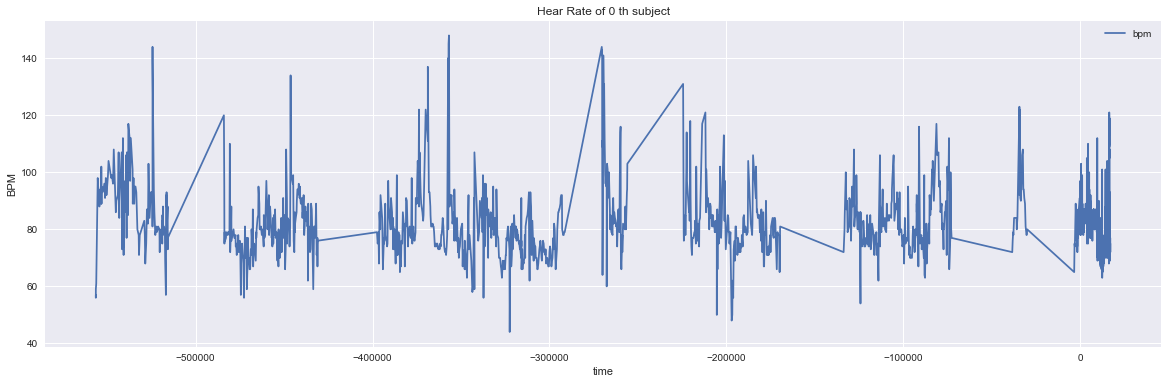

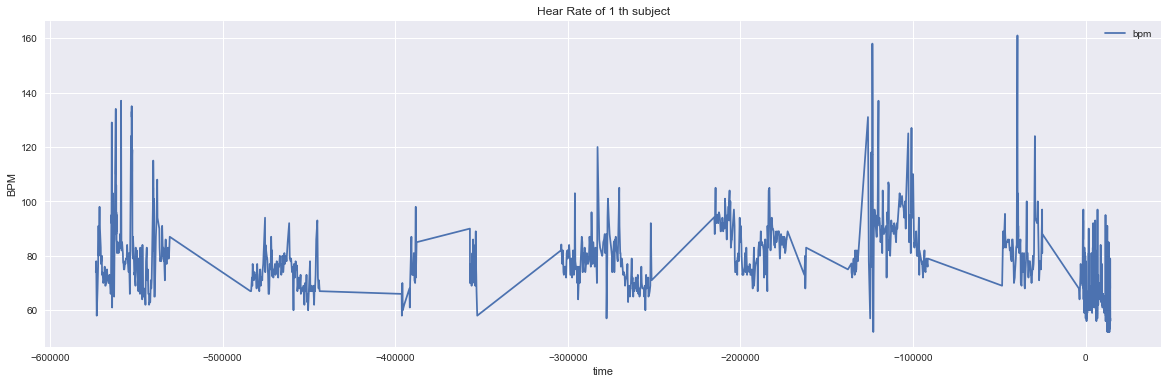

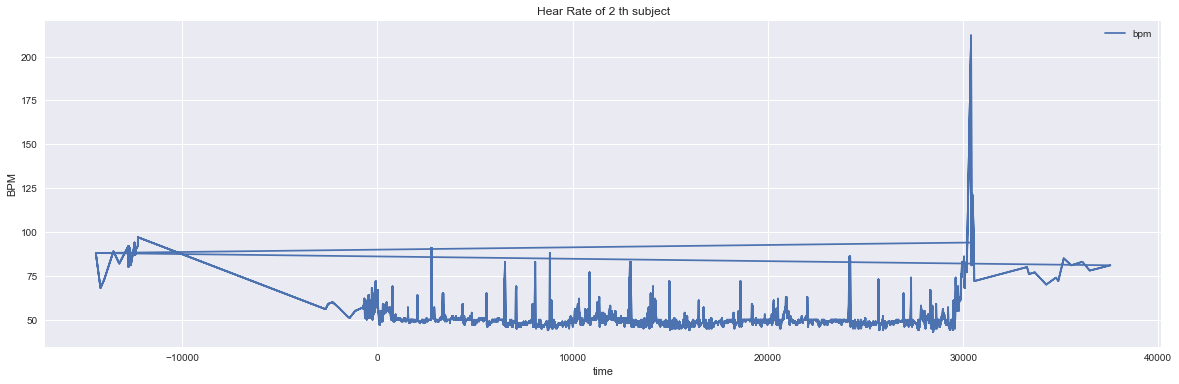

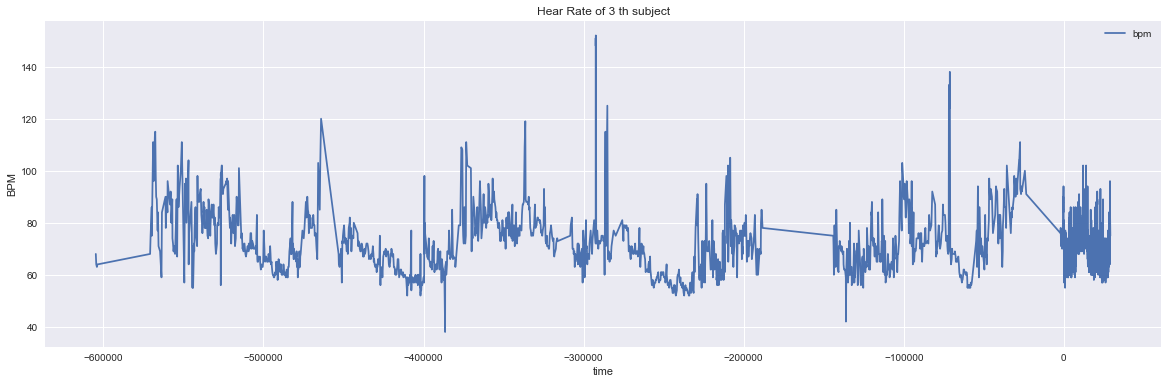

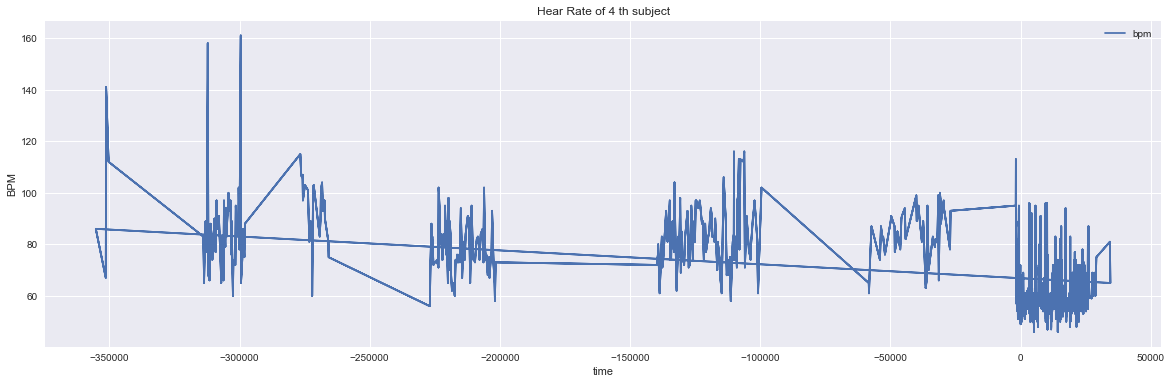

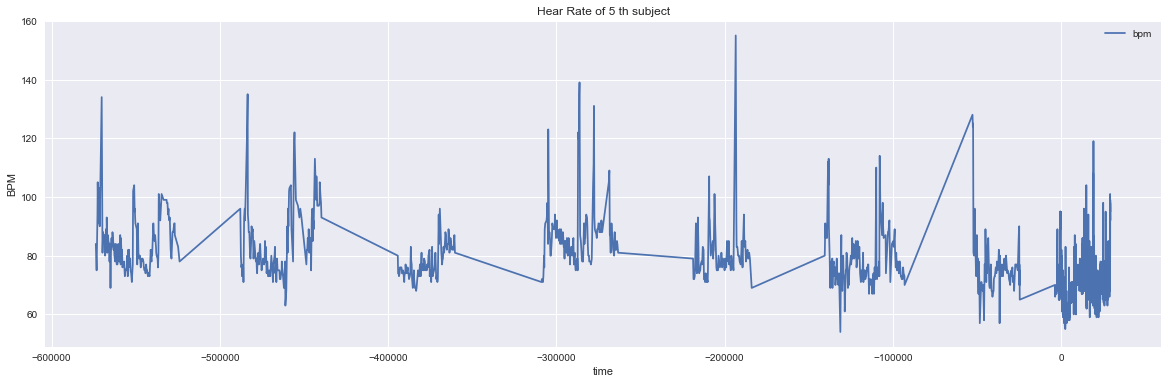

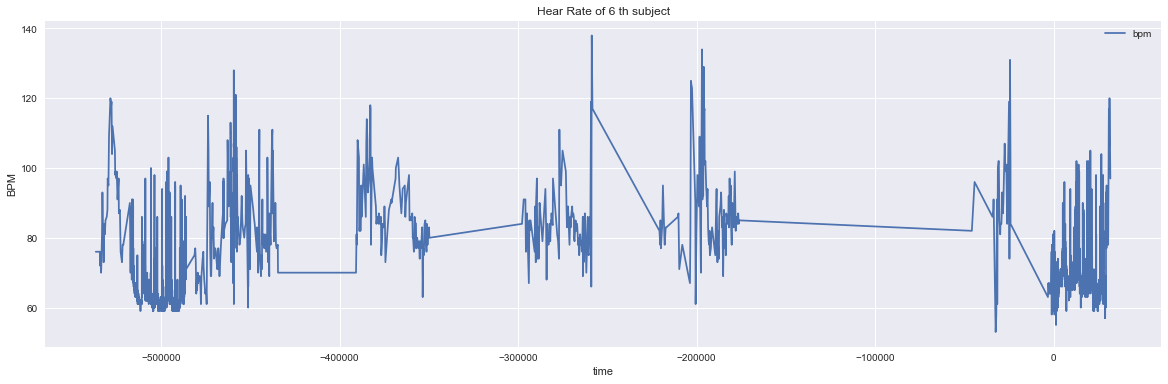

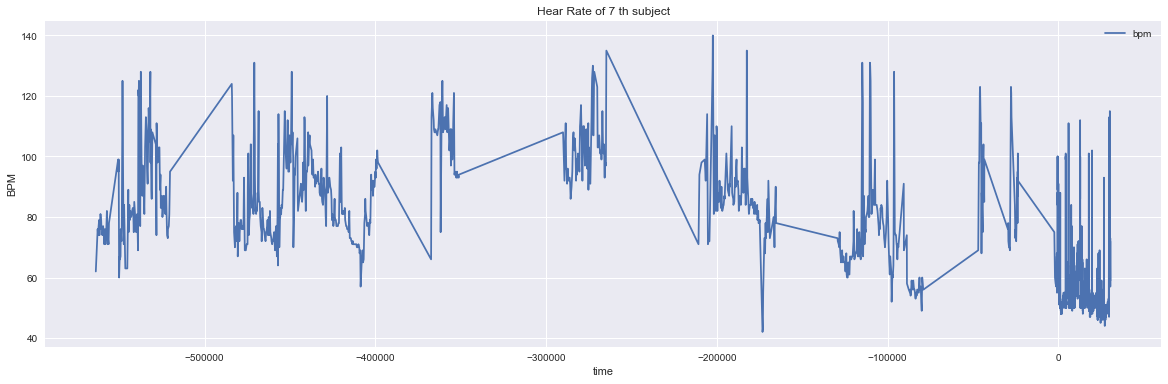

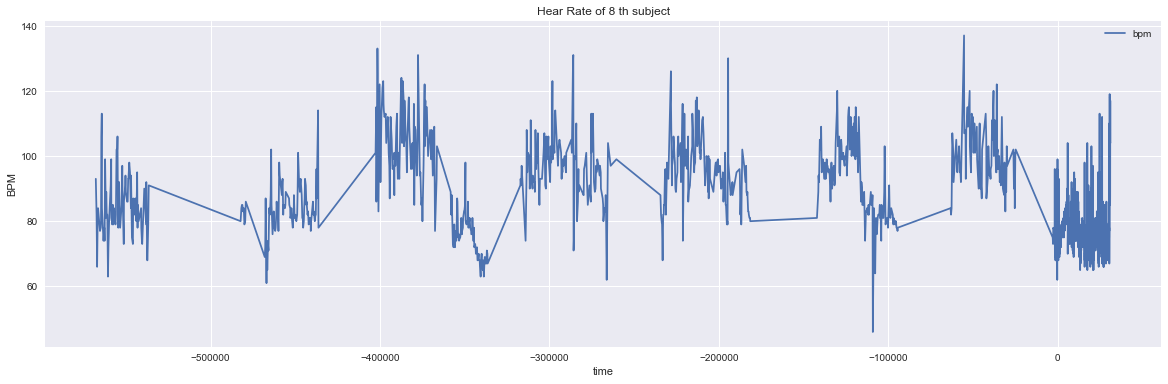

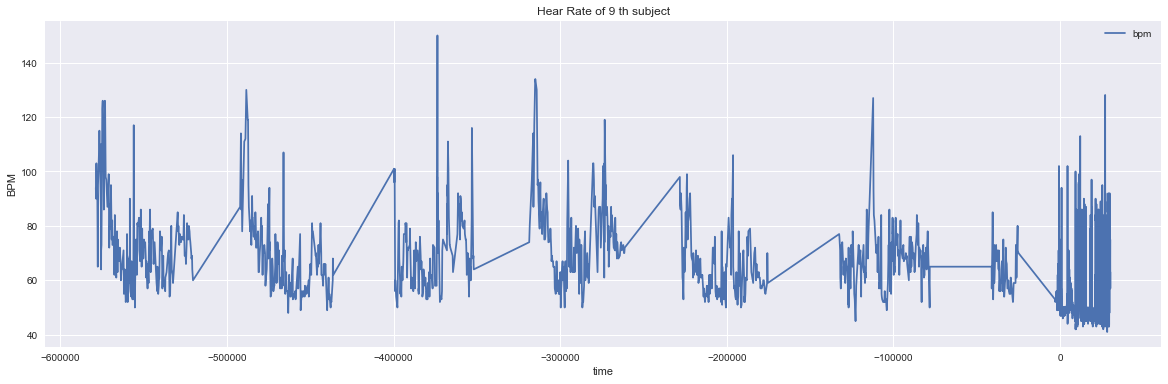

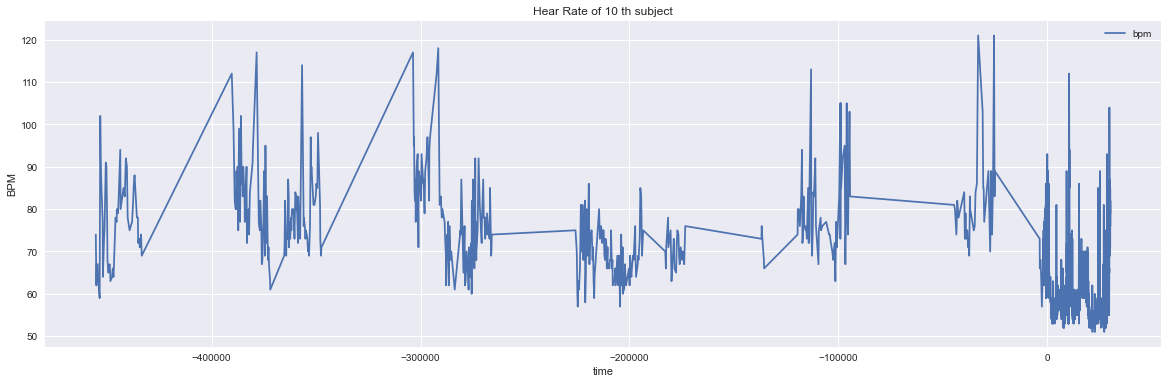

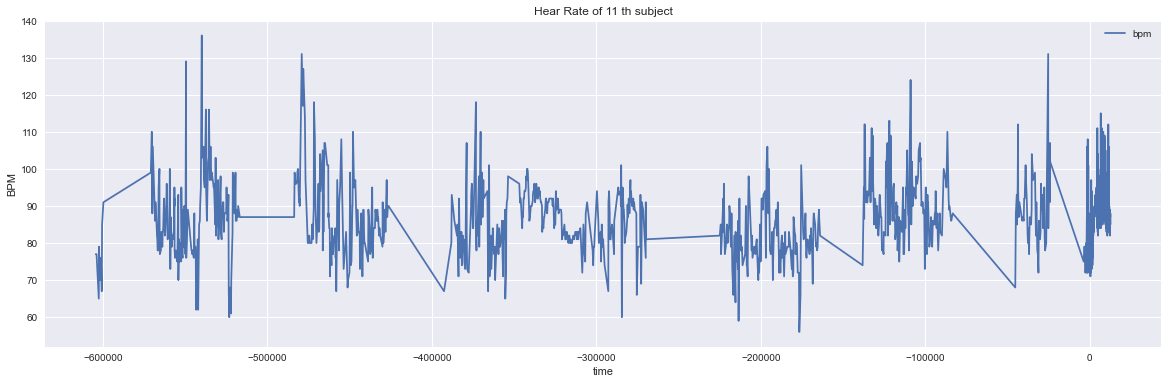

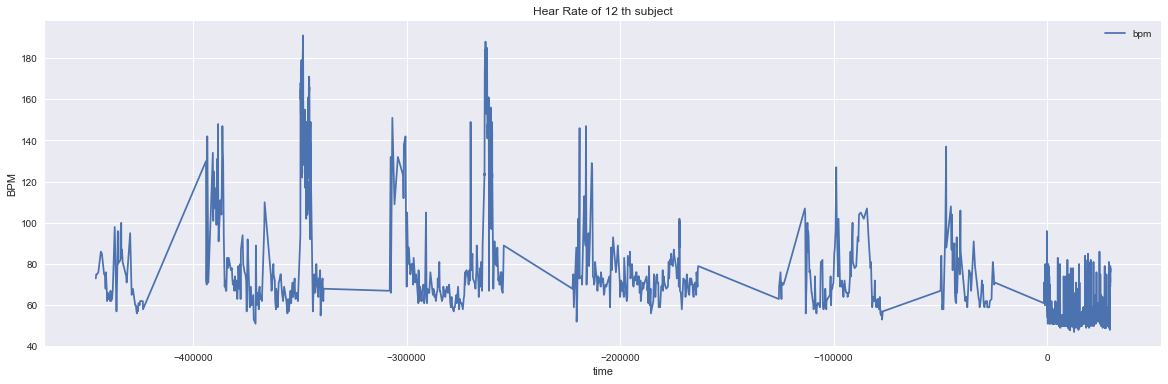

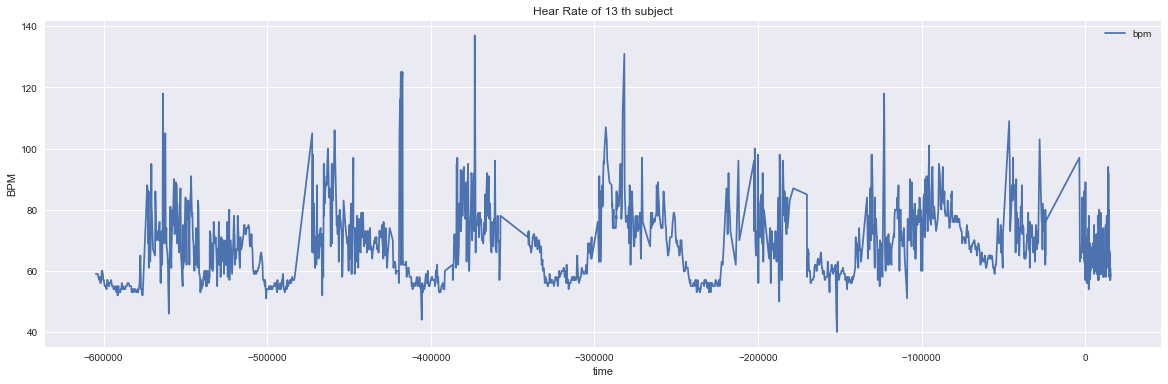

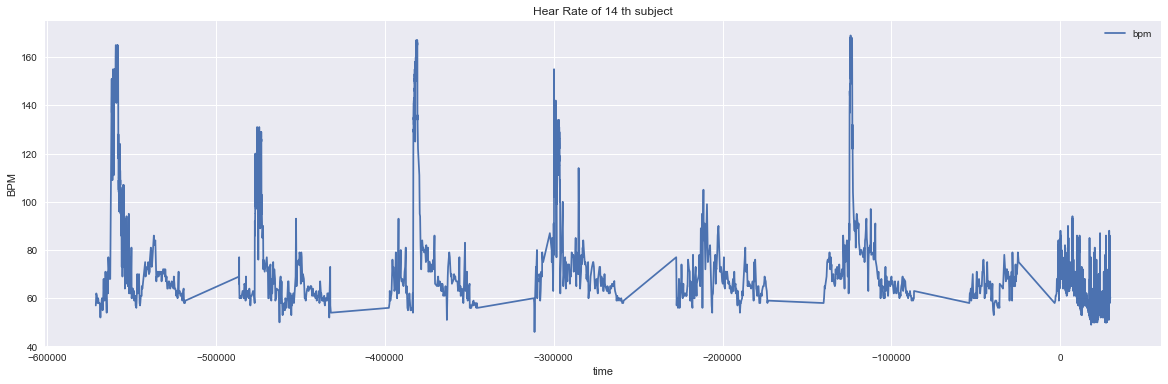

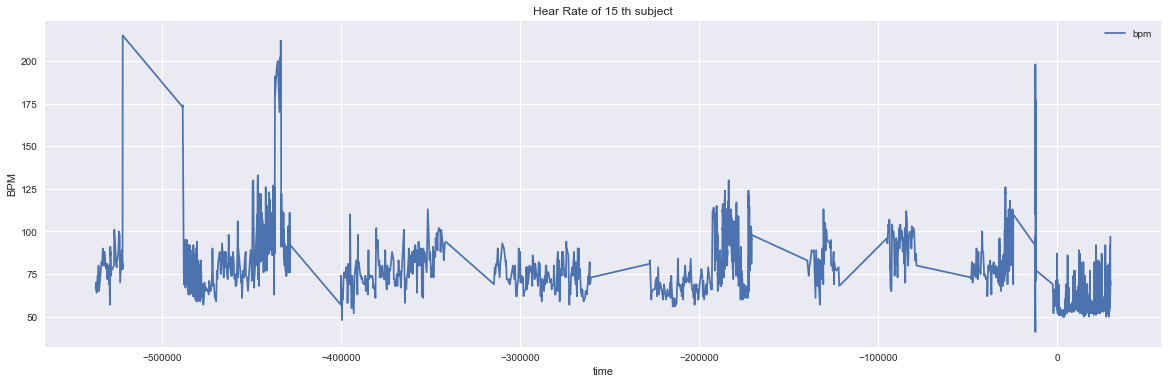

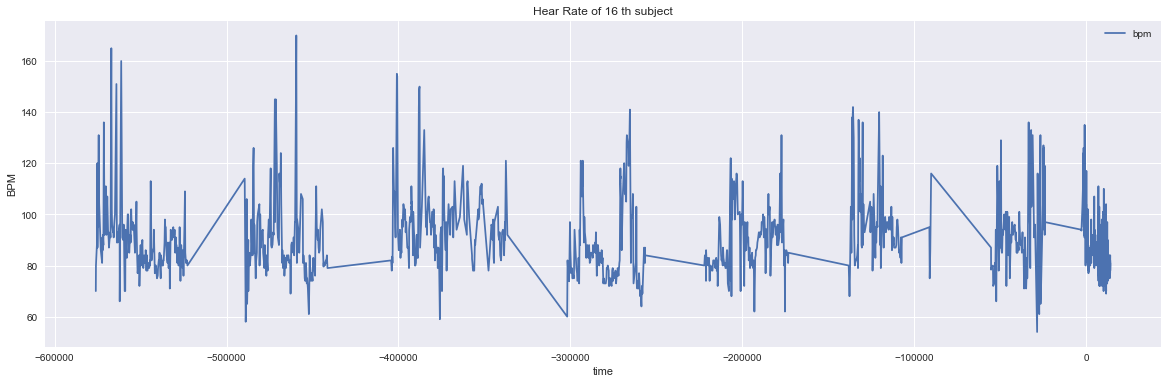

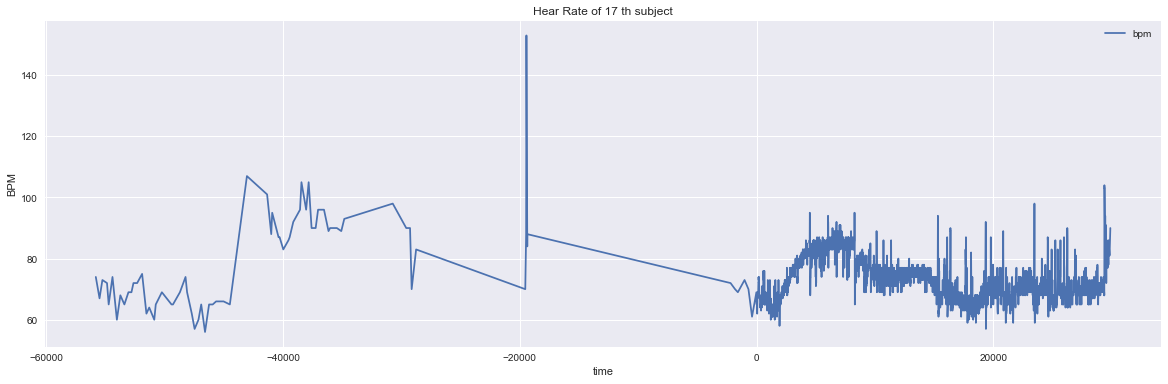

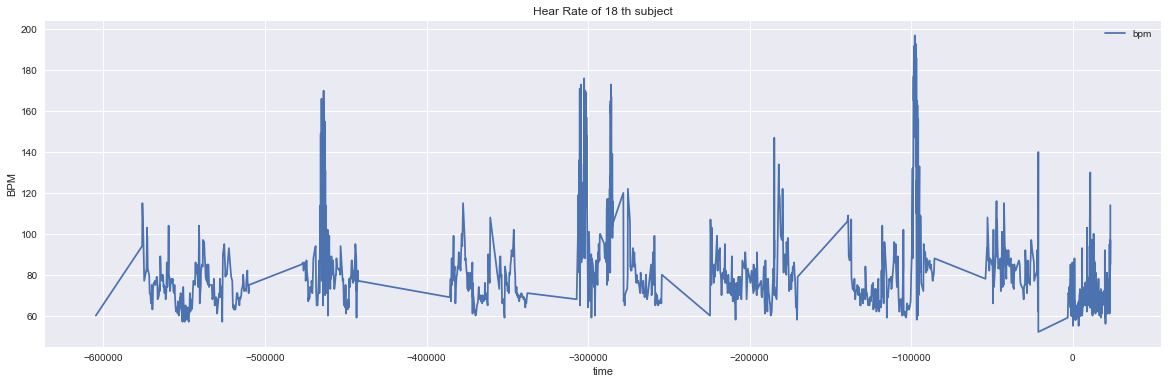

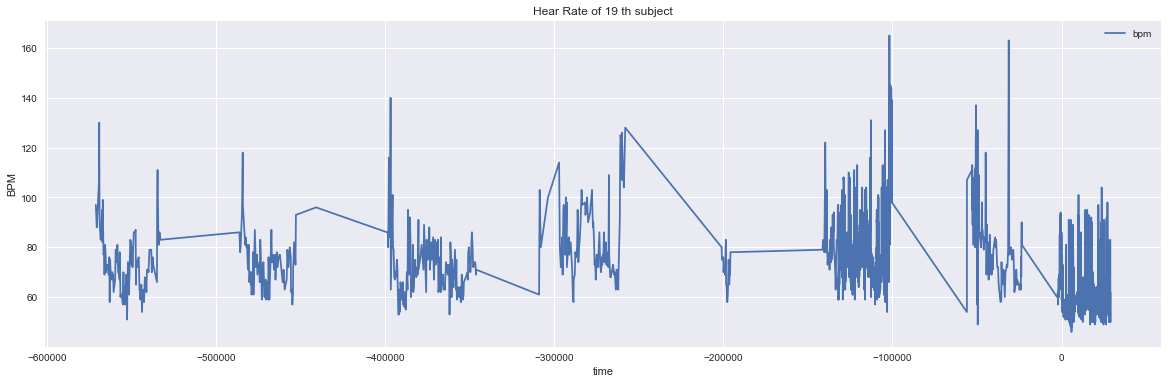

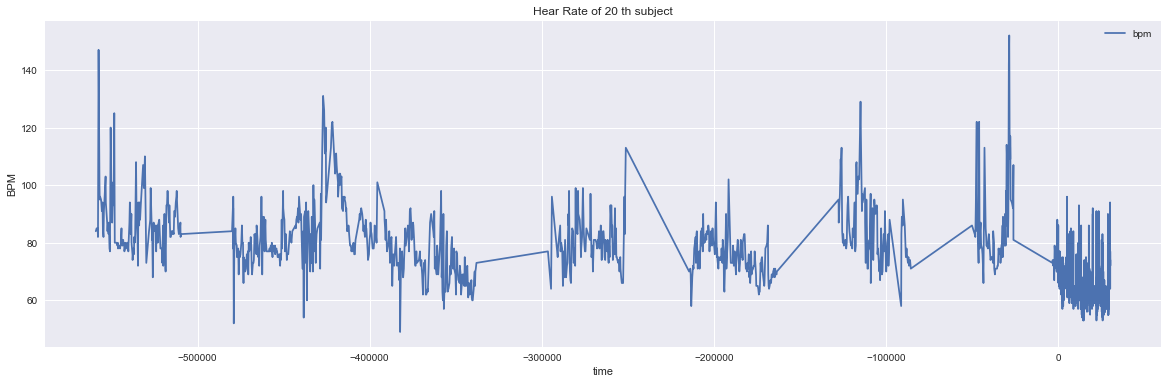

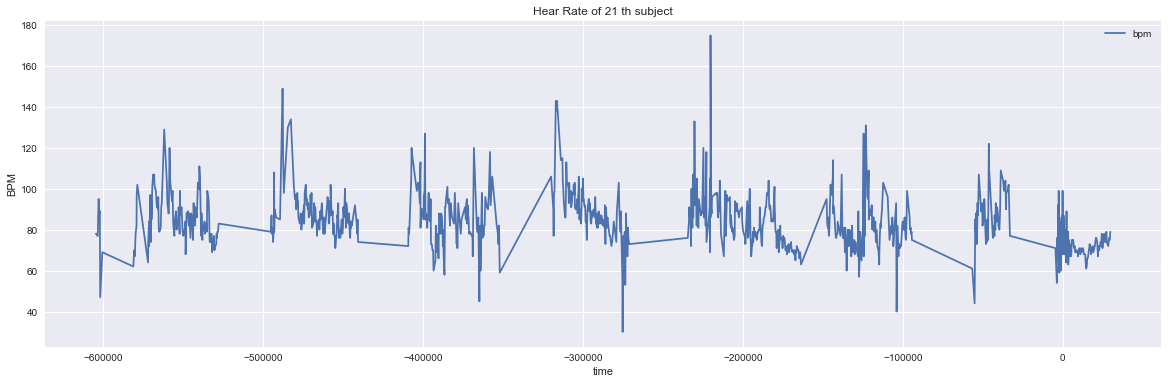

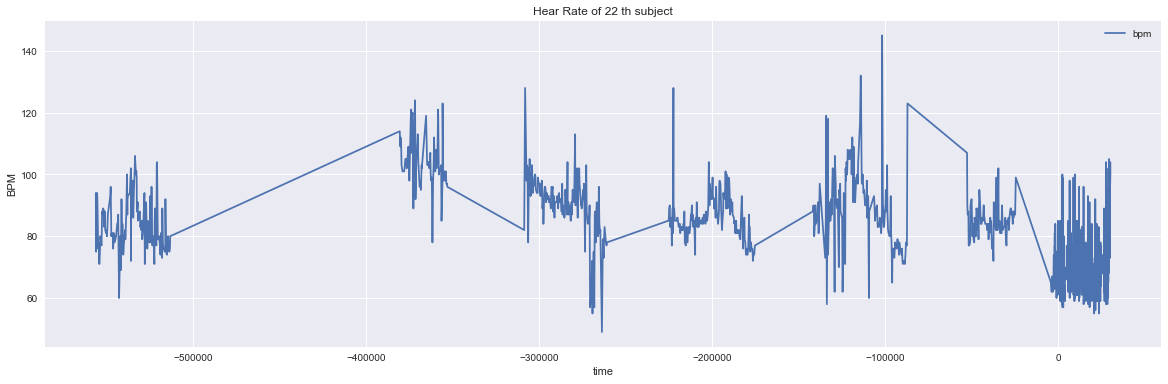

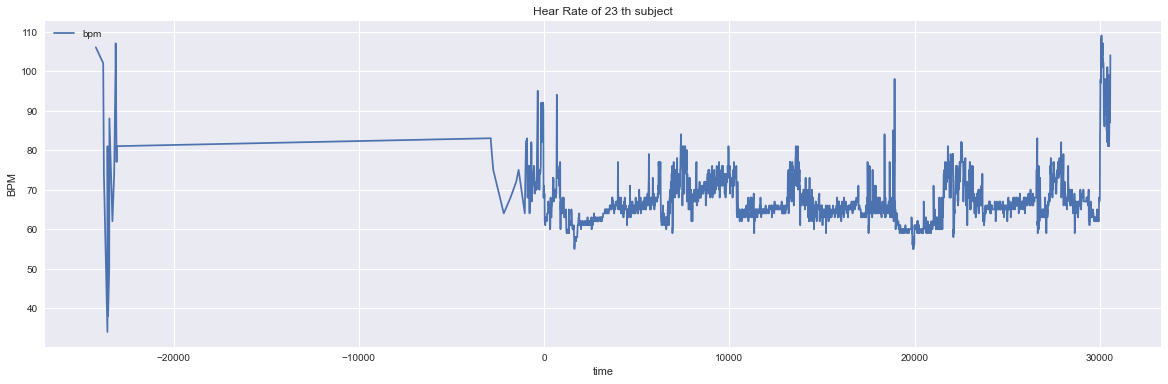

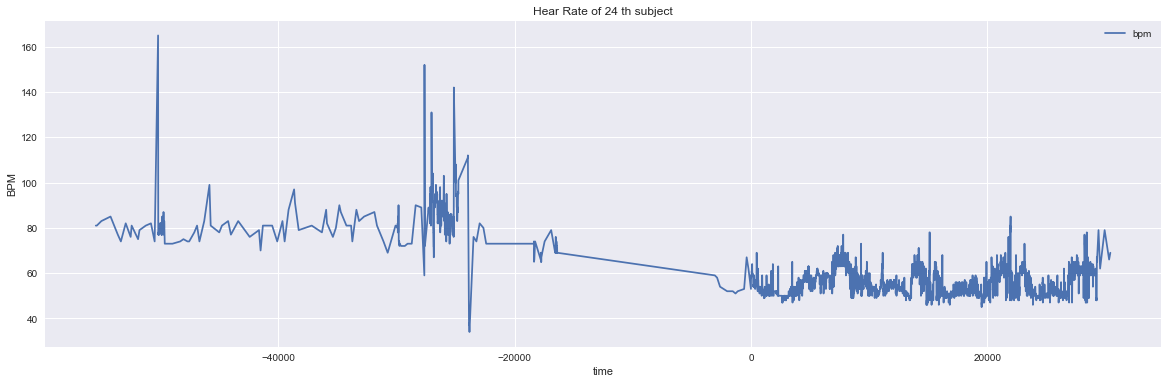

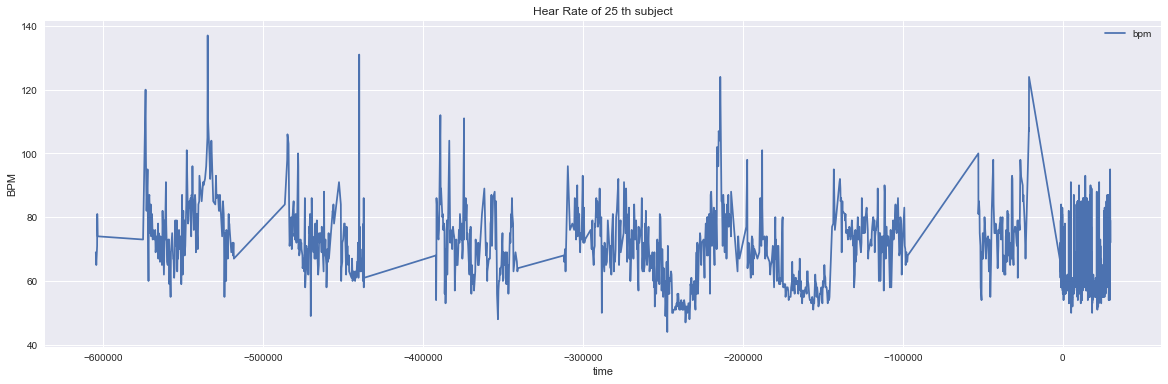

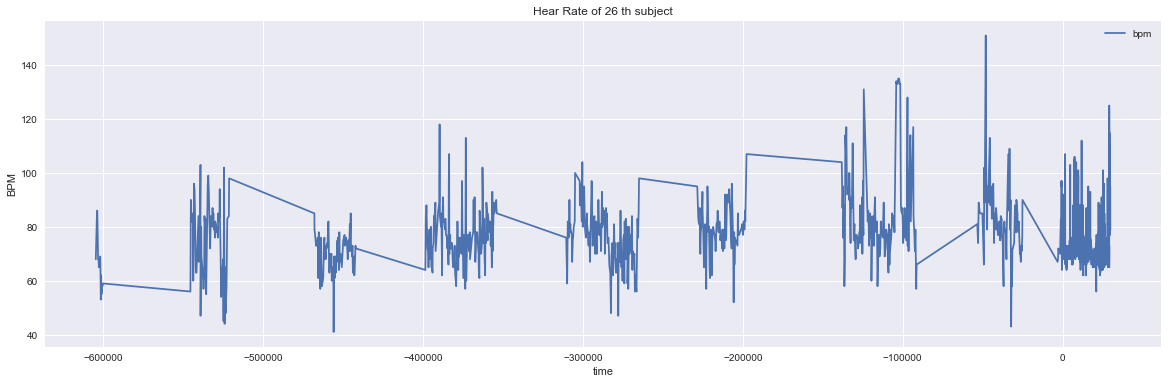

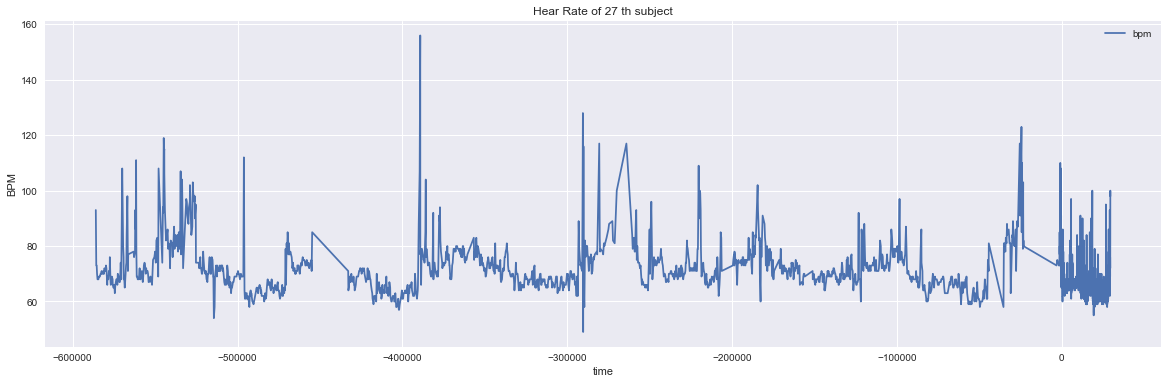

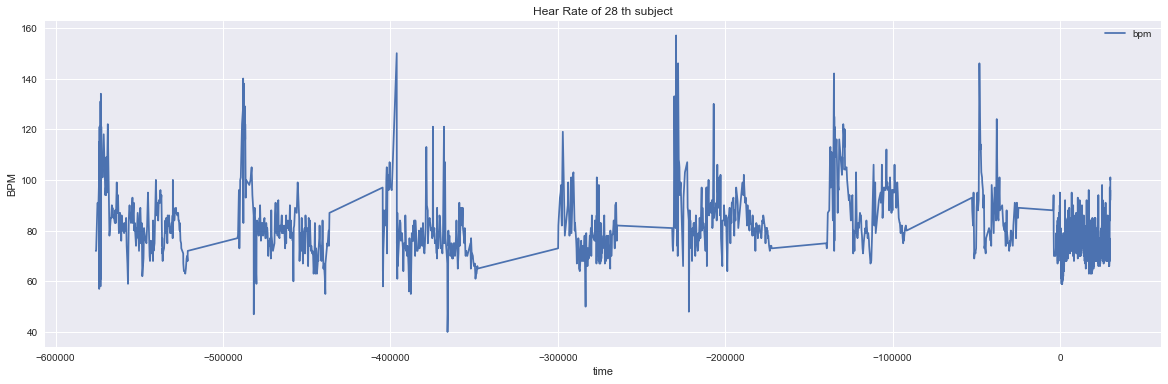

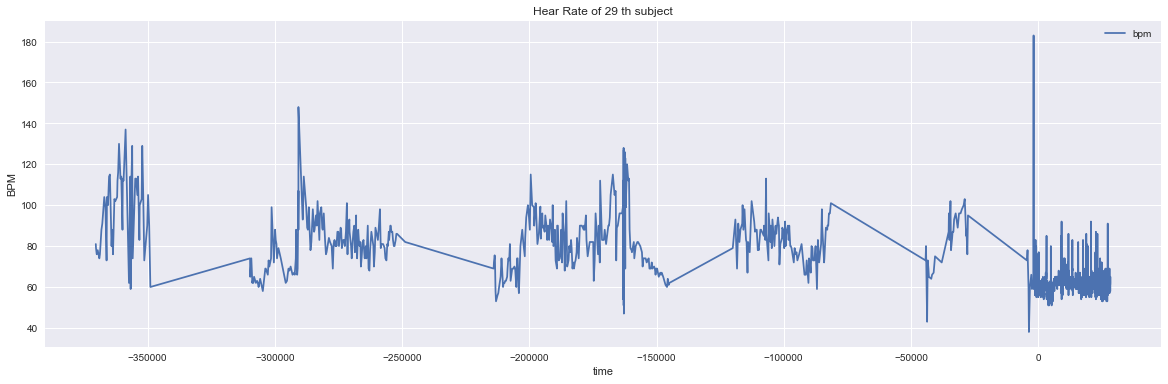

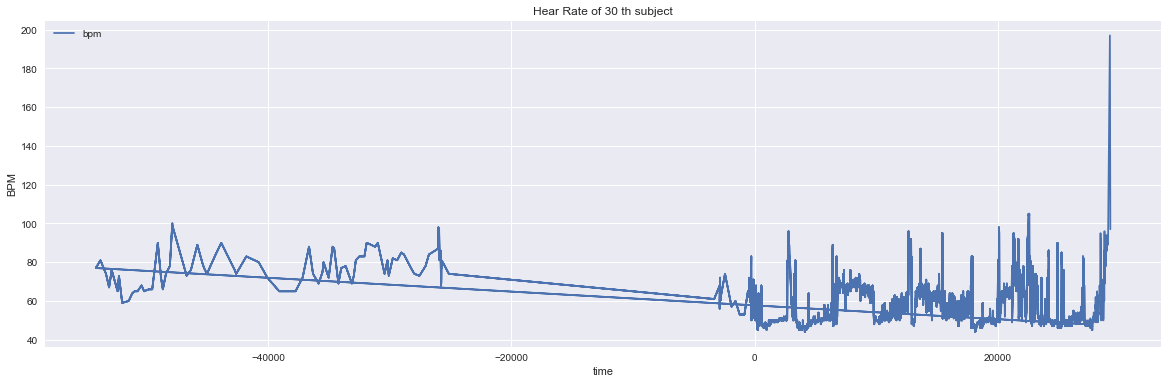

In [4]:
# 각 피험자별 heart rate 출력

for i in range(len(heart_rate)):
    f, ax = plt.subplots(1, 1, figsize=(20, 6))
    plt.title(f'Hear Rate of {i} th subject')
    plt.xlabel('Time')
    plt.ylabel('BPM')
    heart_rate[i].plot(x='time', y='bpm', kind='line', ax = ax)
    plt.show()

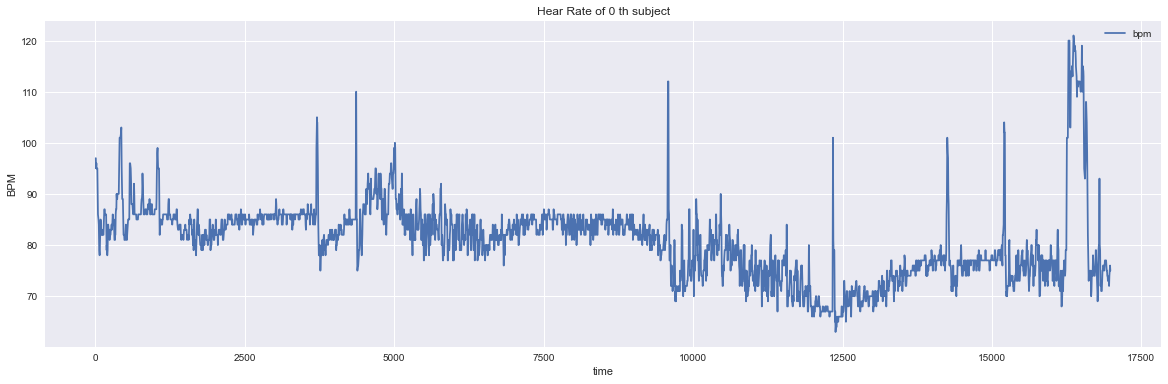

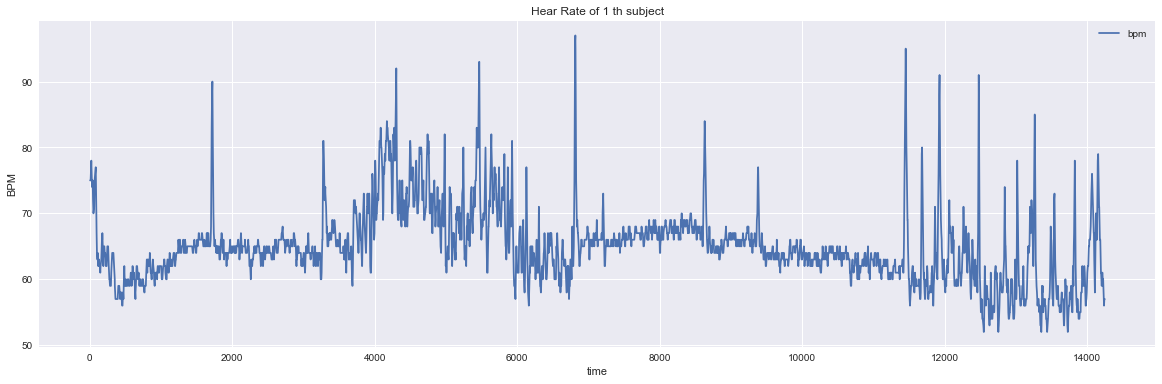

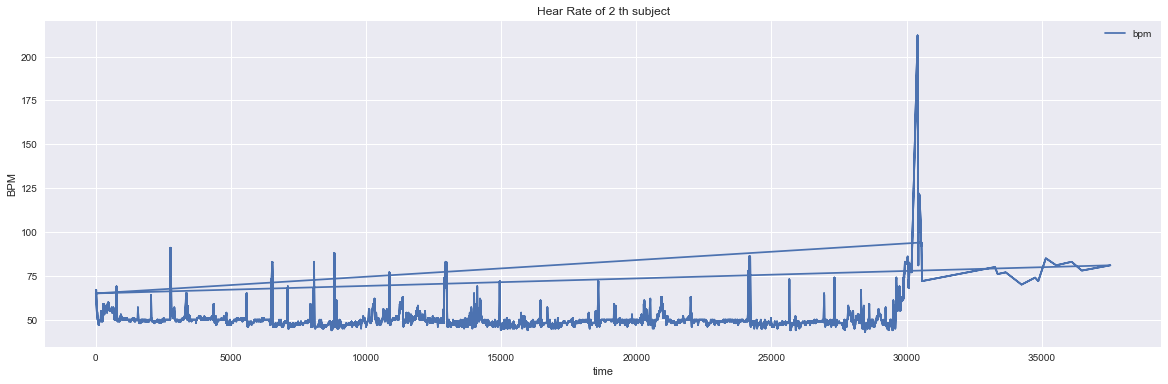

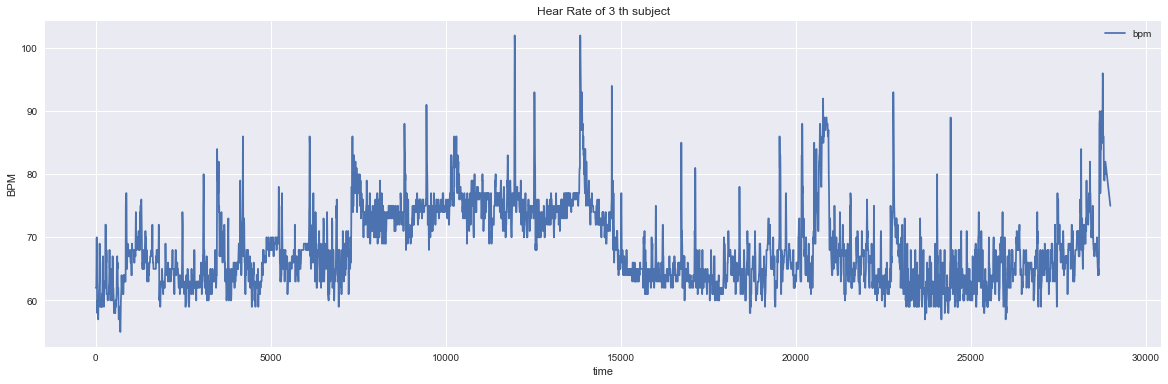

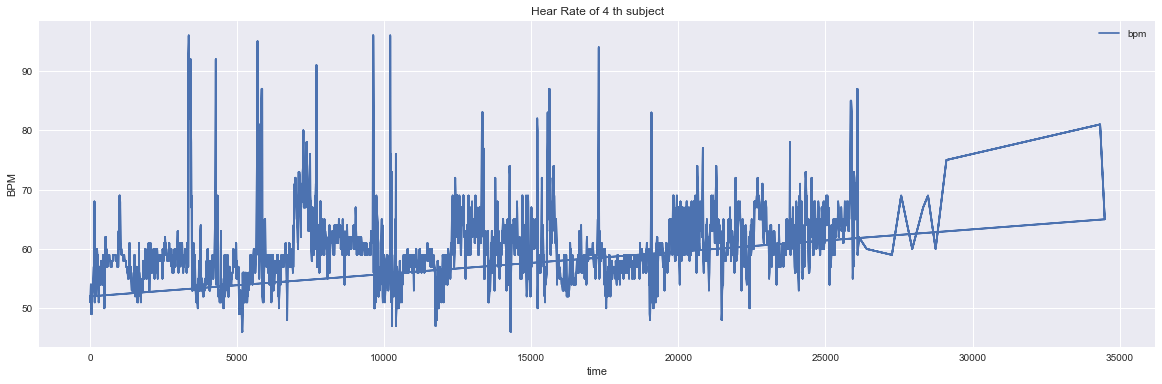

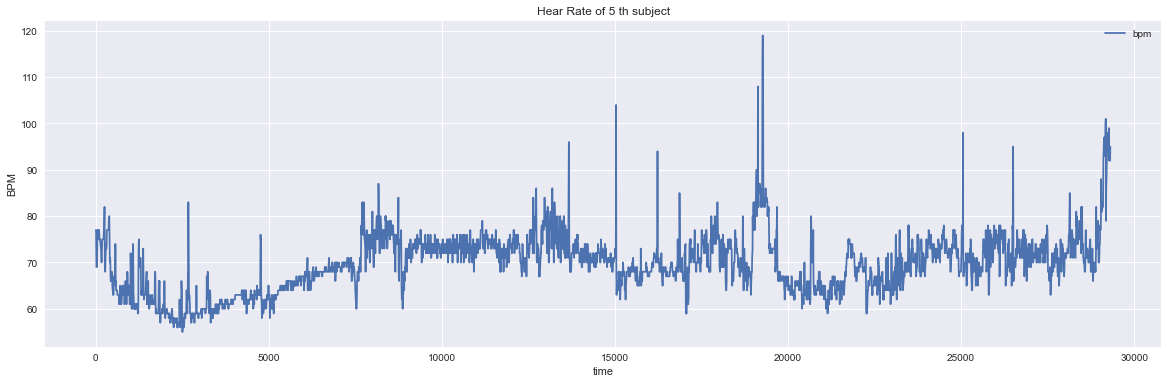

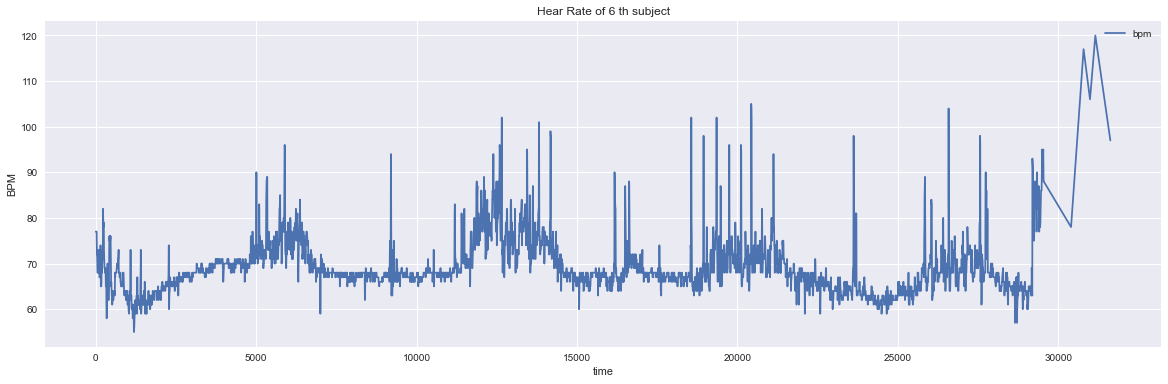

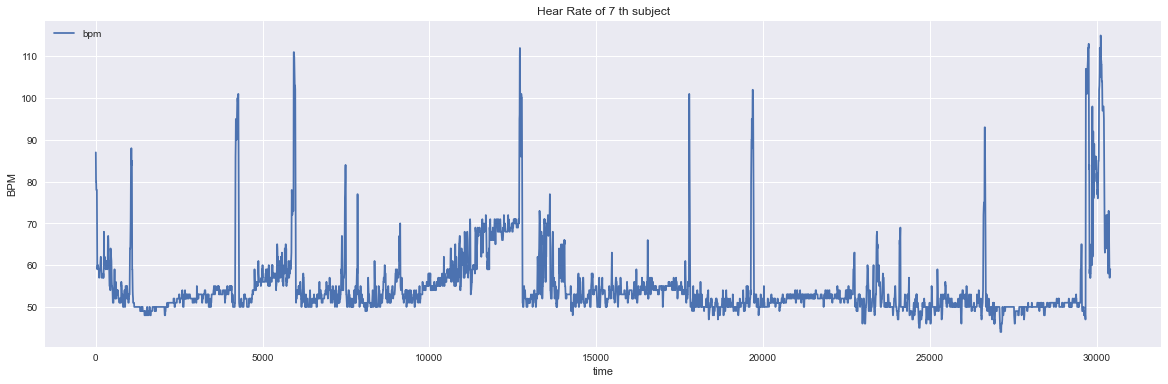

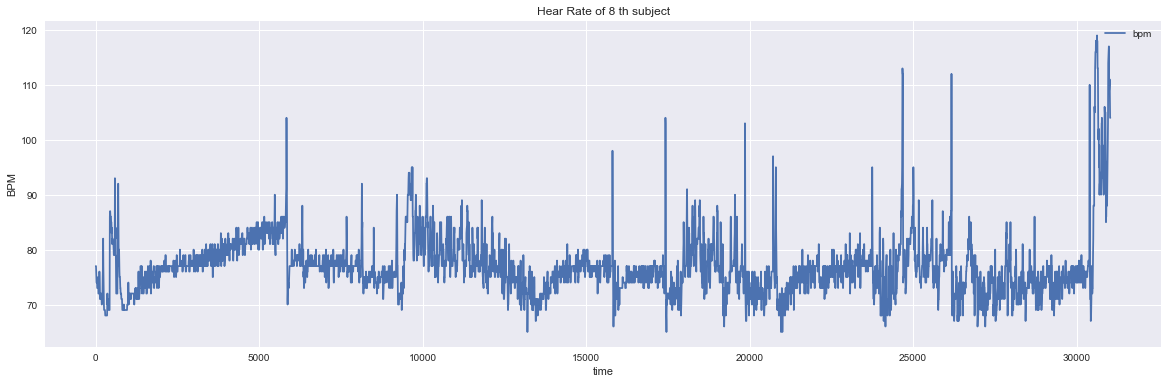

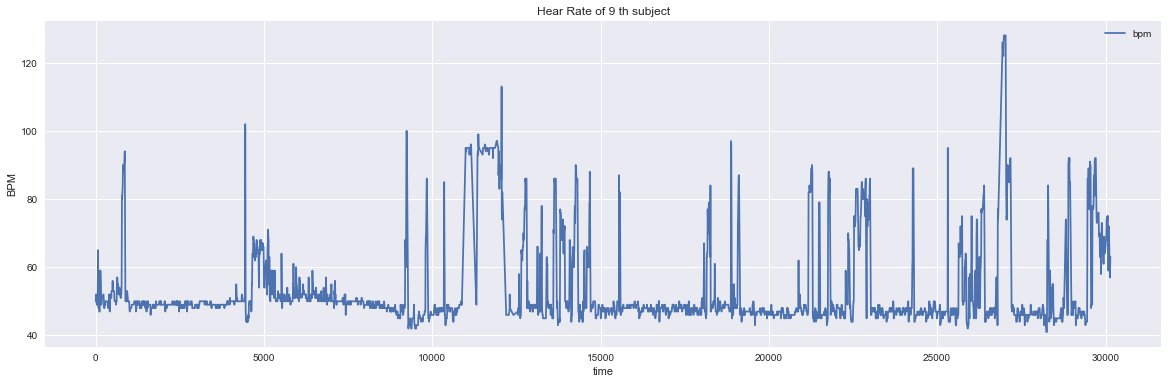

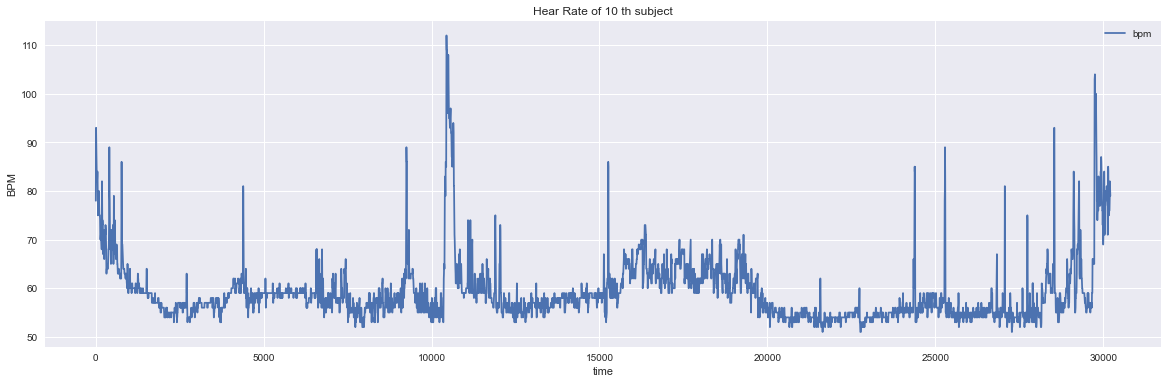

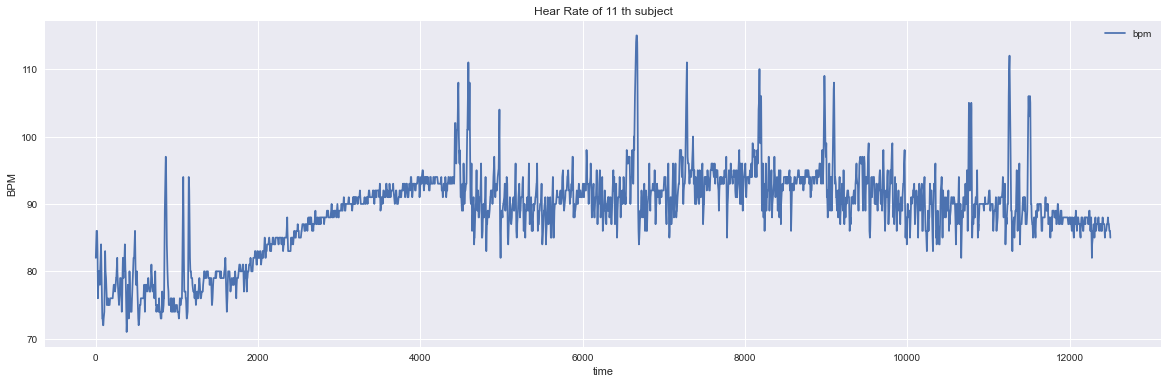

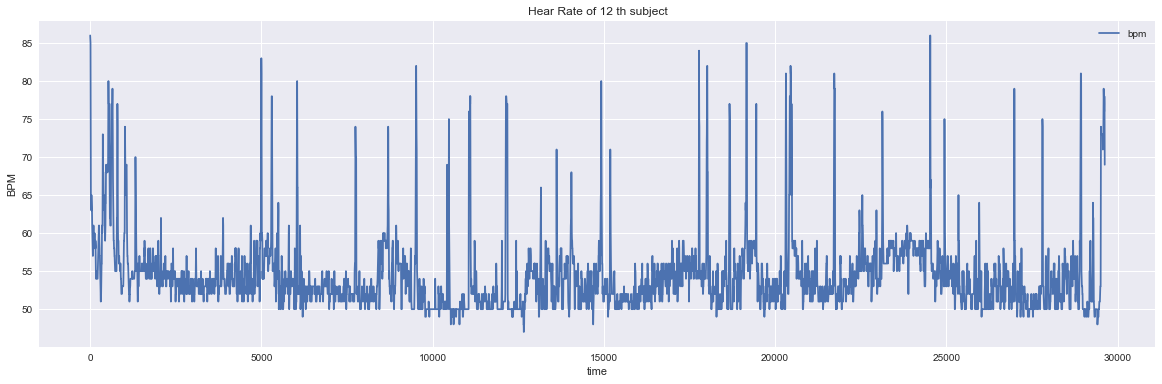

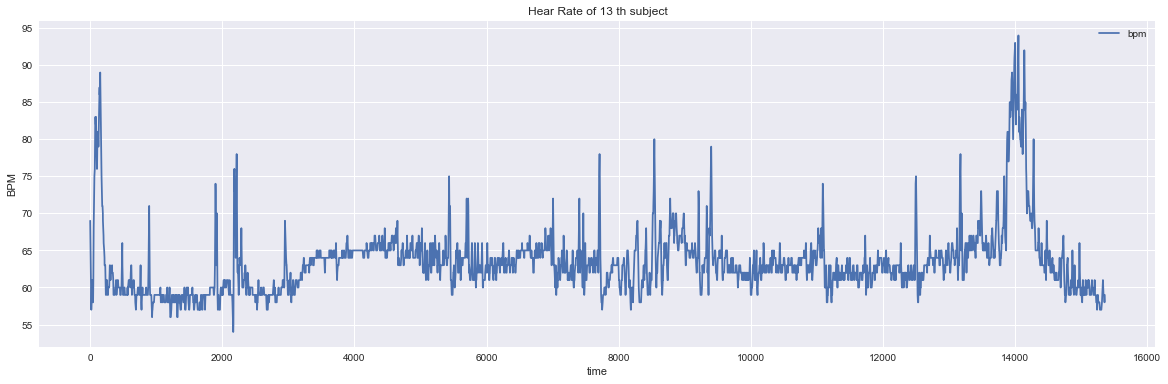

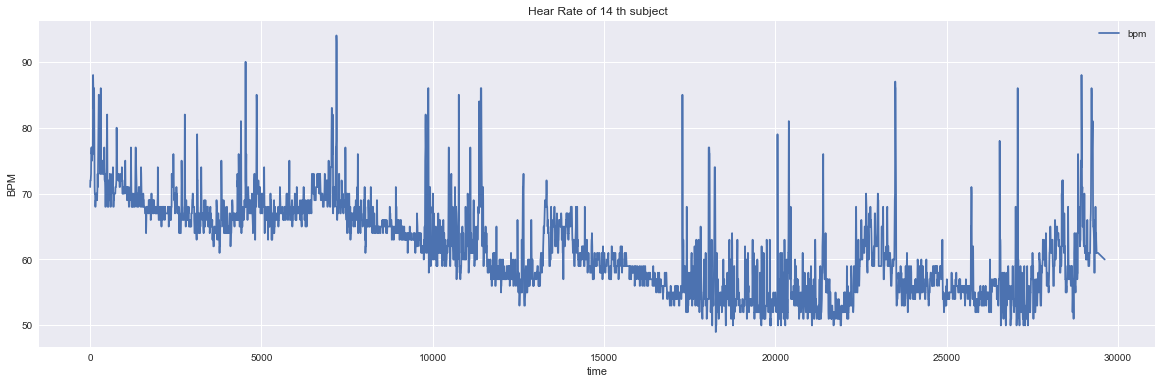

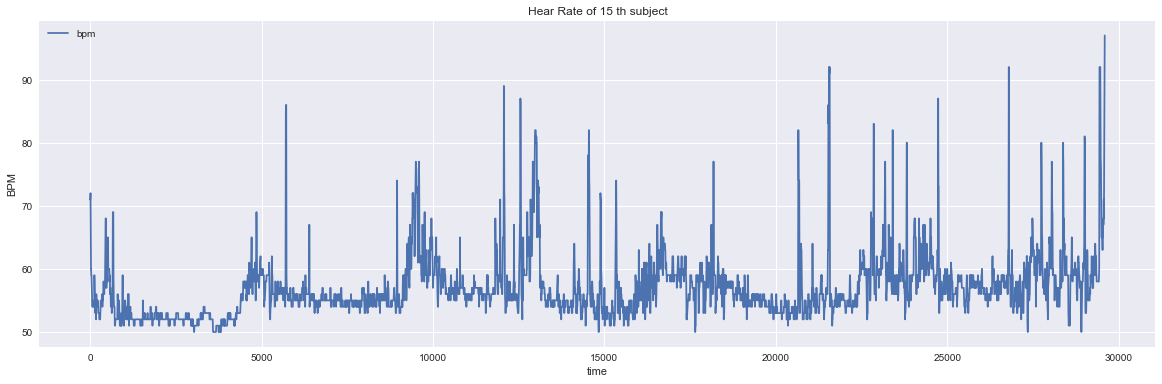

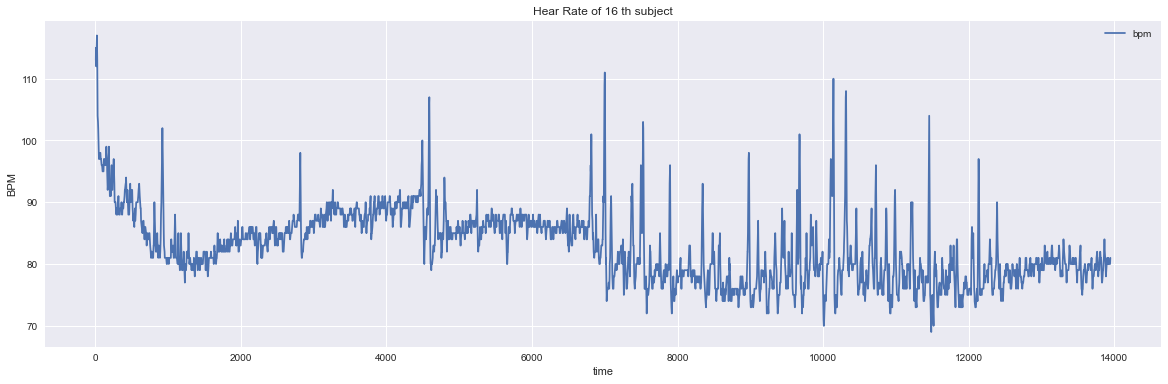

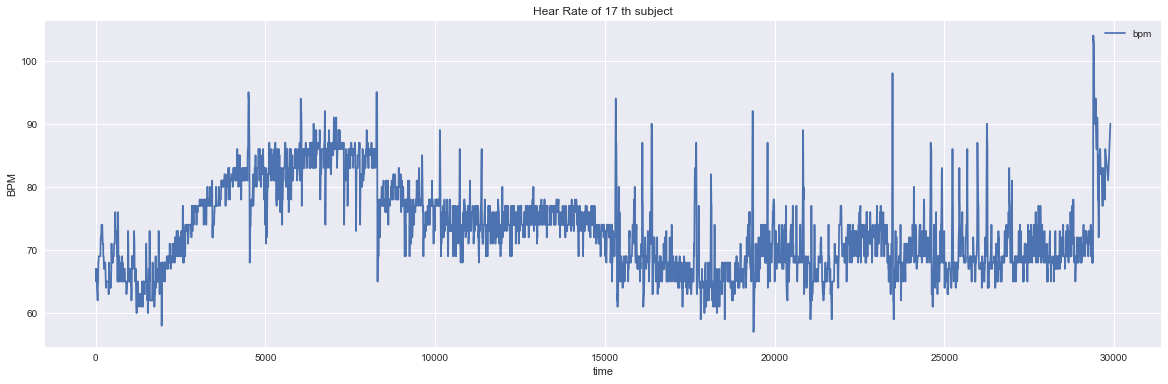

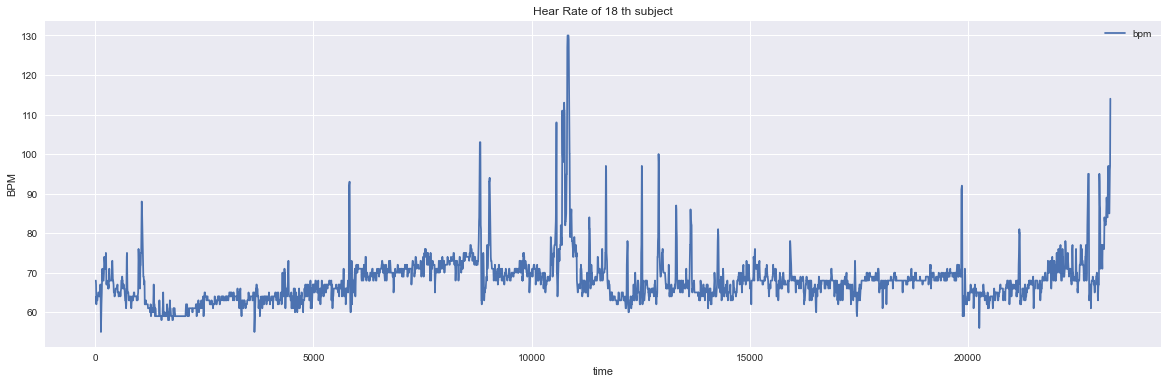

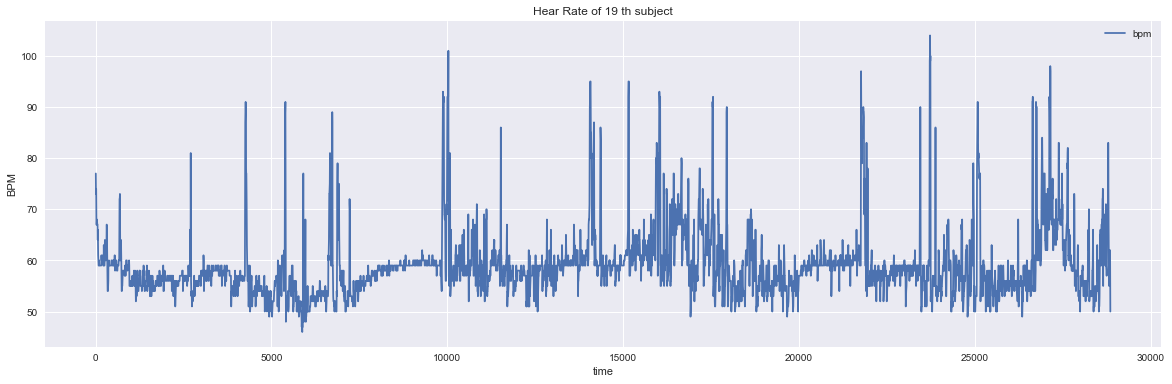

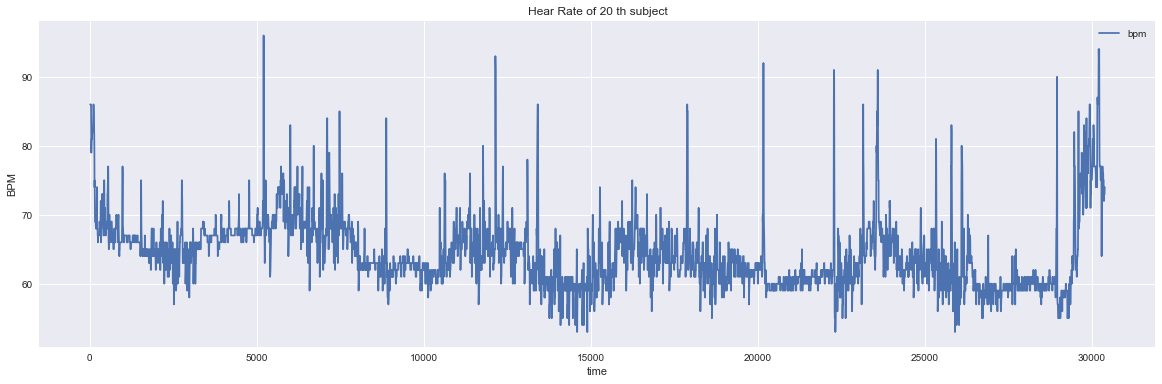

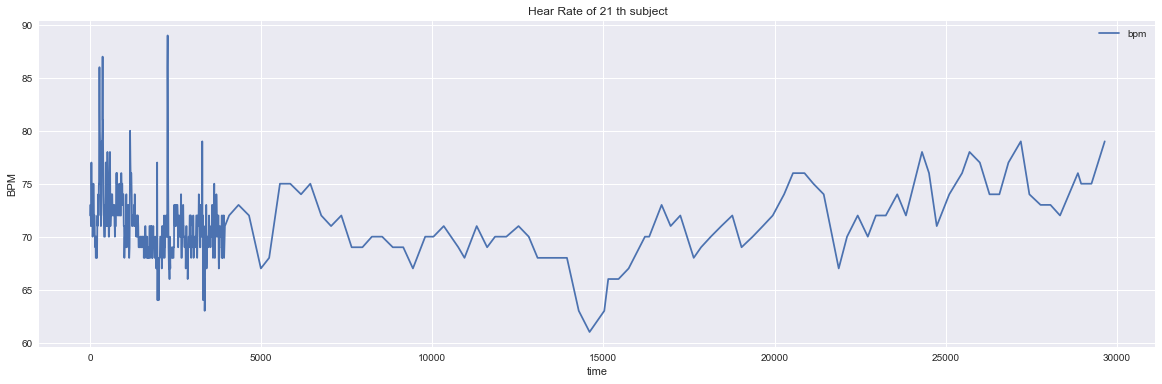

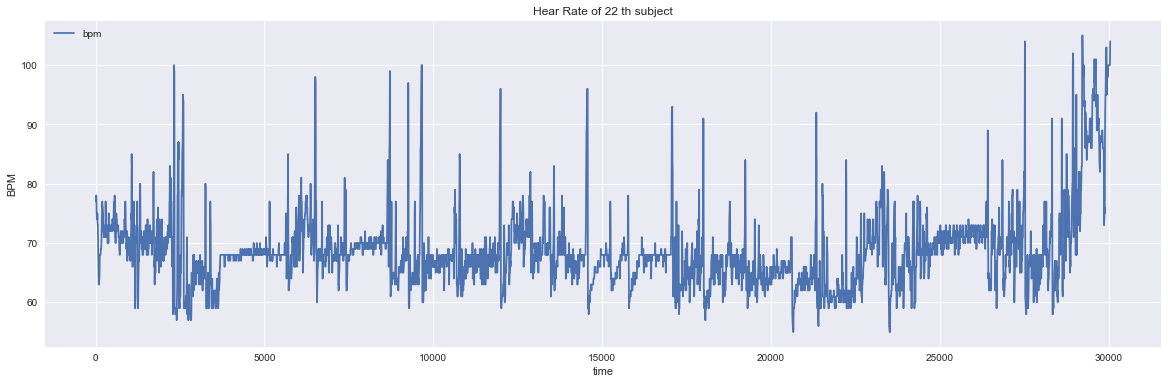

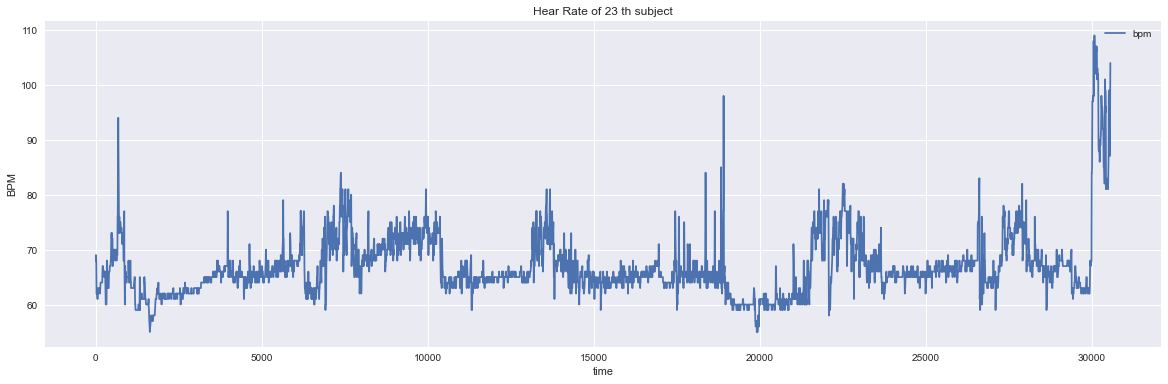

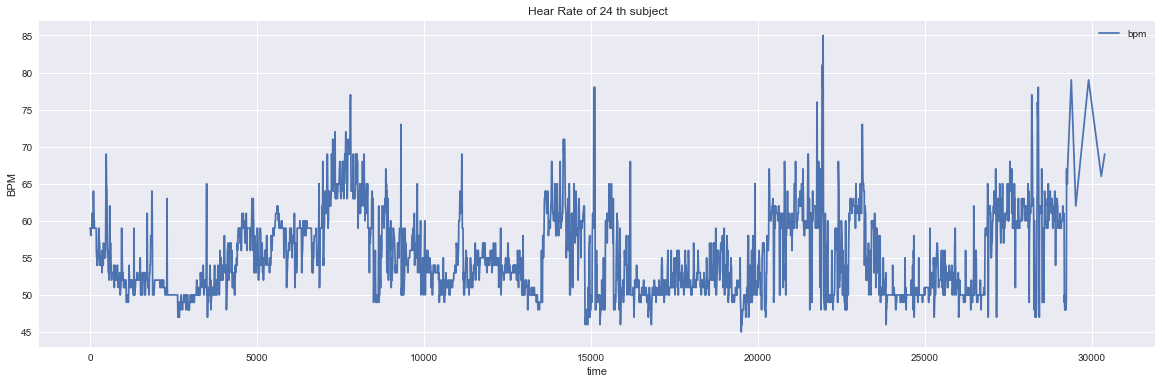

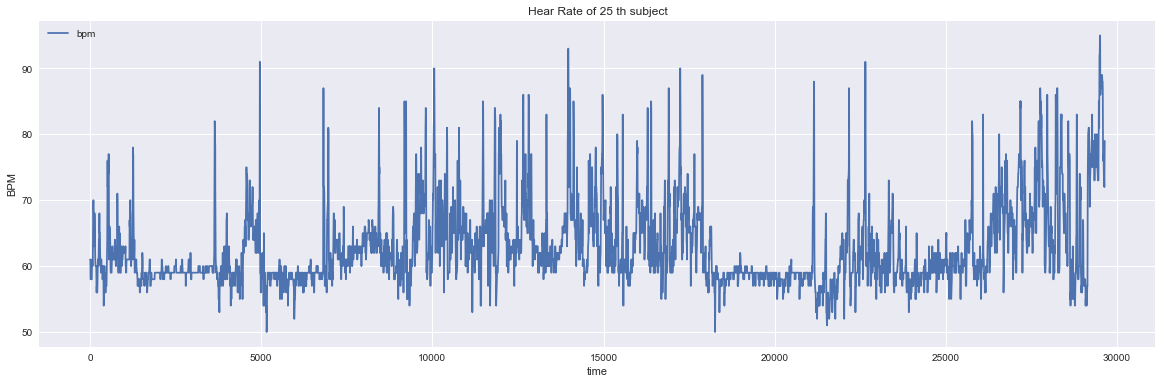

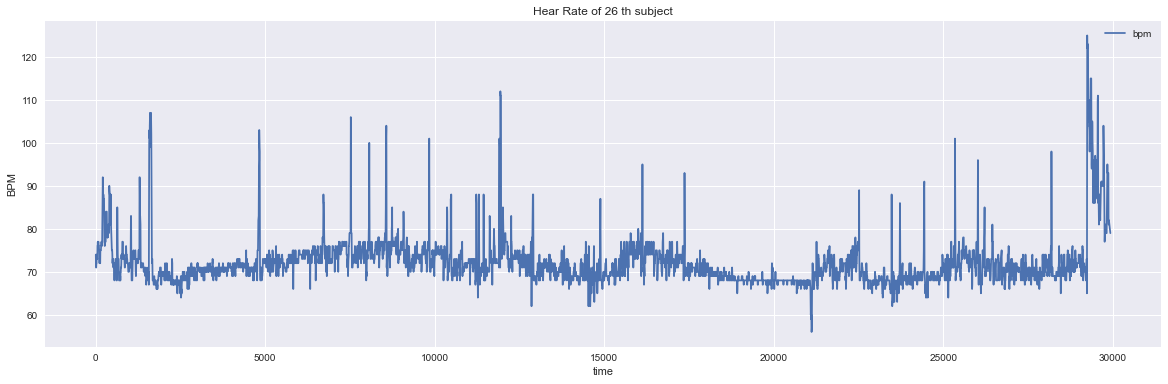

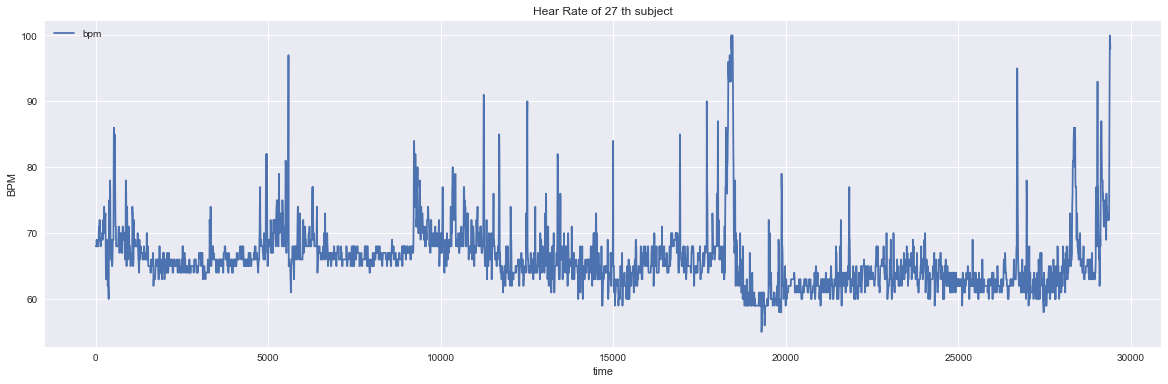

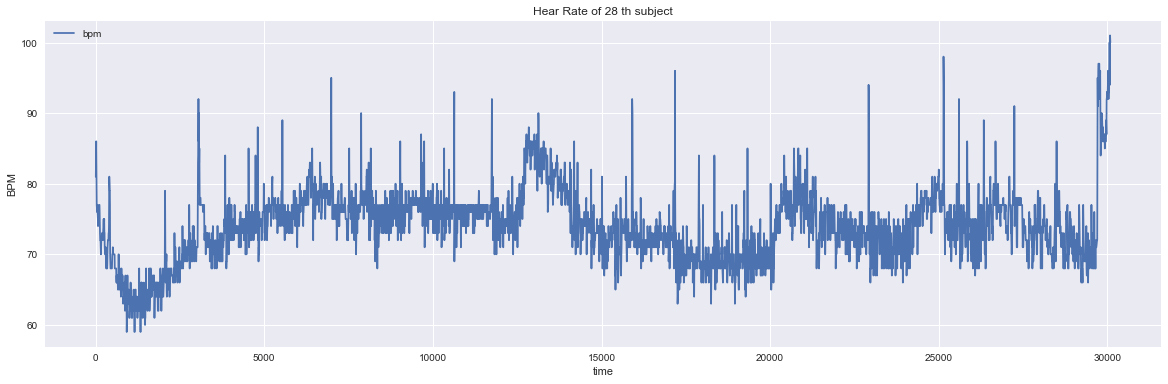

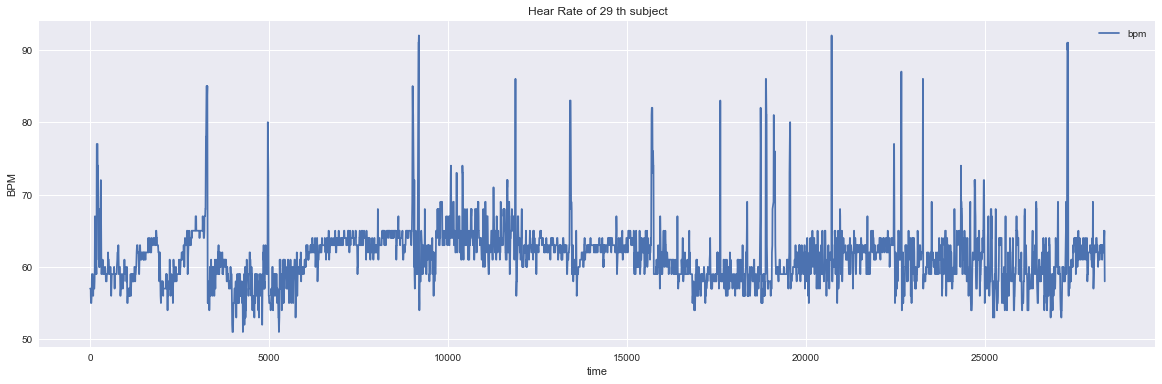

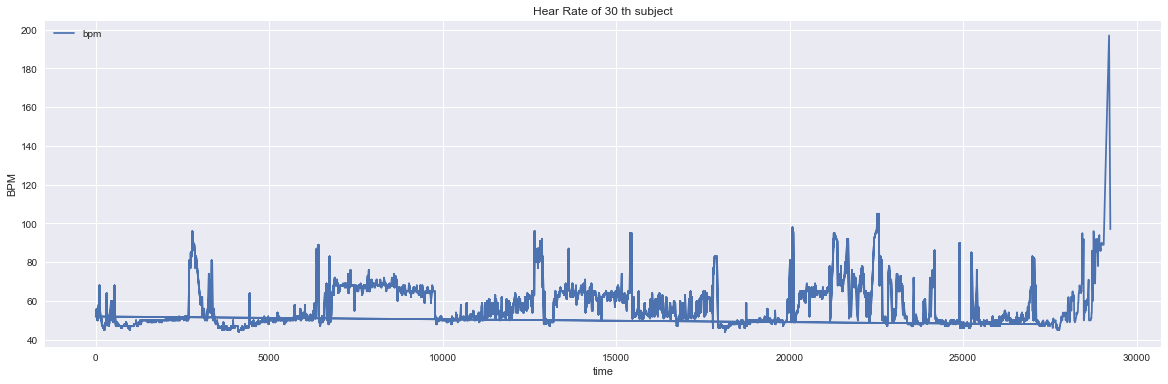

In [5]:
# PSG 측정 시작 시간 이후의 heart rate 확인

for i in range(len(heart_rate)):
    f, ax = plt.subplots(1, 1, figsize=(20, 6))
    plt.title(f'Hear Rate of {i} th subject')
    plt.xlabel('Time')
    plt.ylabel('BPM')
    heart_rate[i][heart_rate[i]['time'] >=0].plot(x='time', y='bpm', kind='line', ax = ax)
    plt.show()

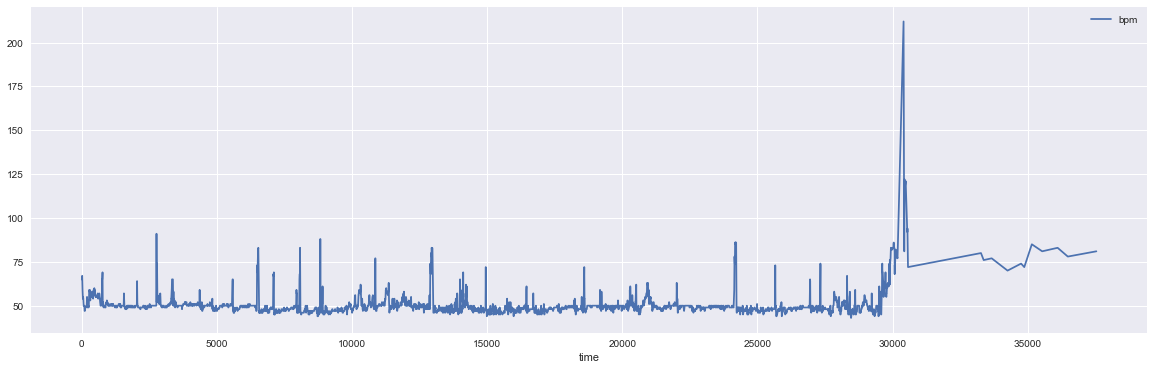

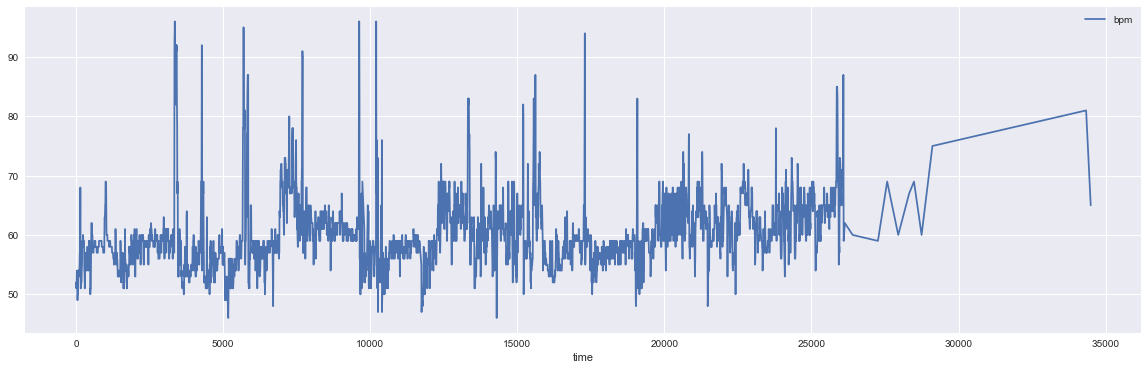

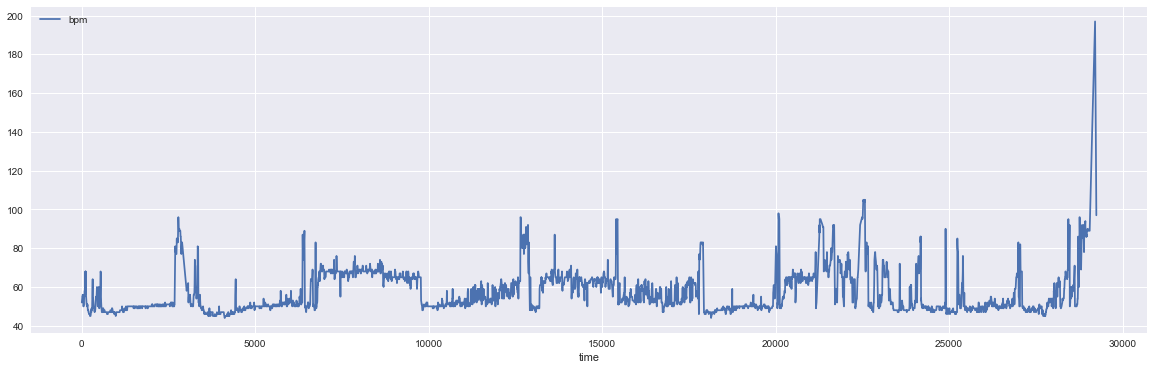

In [6]:
# 2, 4, 30번 피험자는 값이 중복해서 나오므로 정리 필요 ( 두 번 나옴 )
df_list = [heart_rate[2], heart_rate[4], heart_rate[30]] 

for df in df_list:
    # 데이터프레임의 인덱스와 Time 열을 순회하면서 감소하는 지점을 찾음
    prev_val = -999999
    time_idx = []

    for index, row in df.iterrows():
        if row['time'] < prev_val:
            prev_val = row['time']
            time_idx.append(index)
        
        prev_val = row['time']
    
    df2 = df.iloc[max(time_idx):, :]
    f, ax = plt.subplots(1, 1, figsize=(20, 6))
    df2[df2['time'] >=0].plot(x='time', y='bpm', kind='line', ax = ax)
    plt.show()